In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('train_20171226.csv')

/Users/olivia/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.shape)
df.head()

(20157, 34)


,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,Unnamed: 32,Unnamed: 33
0,201609,289403,94,12,2,1,1,1,6,MT,...,1833,1545,1695,1320,5,2700,1556,1562,NaN,NaN
1,201609,745137,435,637,3,2,1,2,6,DCT,...,1823,1483,1711,1336,5,2648,1553,1544,NaN,NaN
2,201609,714860,180,831,3,2,2,3,6,AT,...,1815,1465,1860,1459,5,2770,1579,1589,NaN,NaN
3,201609,175962,40,750,3,2,1,4,6,AT,...,1706,1469,1625,1145,5,2603,1460,1500,NaN,NaN
4,201609,270690,19,98,2,3,3,1,5,MT,...,1685,1850,1825,1236,5,2720,1420,1440,NaN,NaN


## 转换日期

In [5]:
df['sale_date']=pd.to_datetime(df['sale_date'], format='%Y%m')
df.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,Unnamed: 32,Unnamed: 33
0,2016-09-01,289403,94,12,2,1,1,1,6,MT,...,1833,1545,1695,1320,5,2700,1556,1562,NaN,NaN
1,2016-09-01,745137,435,637,3,2,1,2,6,DCT,...,1823,1483,1711,1336,5,2648,1553,1544,NaN,NaN
2,2016-09-01,714860,180,831,3,2,2,3,6,AT,...,1815,1465,1860,1459,5,2770,1579,1589,NaN,NaN
3,2016-09-01,175962,40,750,3,2,1,4,6,AT,...,1706,1469,1625,1145,5,2603,1460,1500,NaN,NaN
4,2016-09-01,270690,19,98,2,3,3,1,5,MT,...,1685,1850,1825,1236,5,2720,1420,1440,NaN,NaN


## 独立量个数

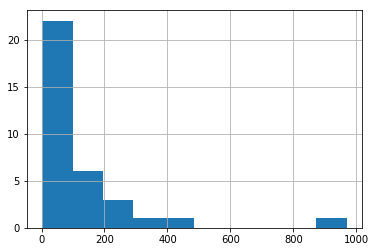

In [6]:
nunique = df.nunique()
nunique.hist()

In [7]:
print('unique class id: %d' % df['class_id'].nunique())

unique class id: 140


## 车型配置数

In [8]:
df.columns

Index(['sale_date', 'class_id', 'sale_quantity', 'brand_id', 'compartment',
       'type_id', 'level_id', 'department_id', 'TR', 'gearbox_type',
       'displacement', 'if_charging', 'price_level', 'price', 'driven_type_id',
       'fuel_type_id', 'newenergy_type_id', 'emission_standards_id',
       'if_MPV_id', 'if_luxurious_id', 'power', 'cylinder_number',
       'engine_torque', 'car_length', 'car_width', 'car_height',
       'total_quality', 'equipment_quality', 'rated_passenger', 'wheelbase',
       'front_track', 'rear_track', 'Unnamed: 32', 'Unnamed: 33'],
      dtype='object')

In [9]:
type_cols = ['class_id', 'TR', 'gearbox_type',
       'displacement', 'if_charging', 'price_level','driven_type_id',
       'fuel_type_id', 'newenergy_type_id', 'emission_standards_id',
       'if_MPV_id', 'if_luxurious_id', 'power', 'cylinder_number']
type_cols1 = ['TR', 'gearbox_type',
       'displacement', 'if_charging', 'price_level','driven_type_id',
       'fuel_type_id', 'newenergy_type_id', 'emission_standards_id',
       'if_MPV_id', 'if_luxurious_id', 'power', 'cylinder_number']

In [10]:
class_type = df[type_cols].drop_duplicates().groupby(['class_id']).count()

In [11]:
class_type.head()

,TR,gearbox_type,displacement,if_charging,price_level,driven_type_id,fuel_type_id,newenergy_type_id,emission_standards_id,if_MPV_id,if_luxurious_id,power,cylinder_number
class_id,,,,,,,,,,,,,
103507,23,23,23,23,23,23,23,23,23,23,23,23,23
124140,13,13,13,13,13,13,13,13,13,13,13,13,13
125403,19,19,19,19,19,19,19,19,19,19,19,19,19
136916,24,24,24,24,24,24,24,24,24,24,24,24,24
169673,1,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
price_level_cols = ['class_id', 'price_level']
class_plevel = df[price_level_cols].drop_duplicates().groupby(['class_id']).count()

In [13]:
class_plevel.head()

,price_level
class_id,
103507,2
124140,1
125403,3
136916,3
169673,1


## 月销量

In [14]:
monthly_sale = df.groupby('sale_date').sale_quantity.agg('sum')

In [15]:
noindex_monthly_sale = monthly_sale.reset_index()

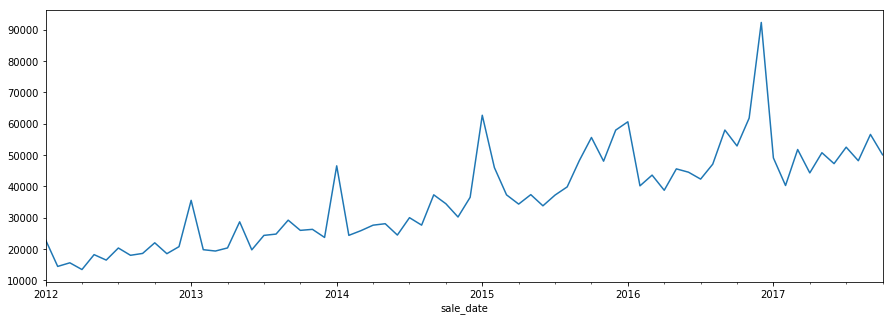

In [16]:
monthly_sale.plot(figsize = (15,5))

In [1]:
noindex_monthly_sale.head()

NameError: name 'noindex_monthly_sale' is not defined

## 价格

In [20]:
df['price']=pd.to_numeric(df['price'],errors='coerce')

In [21]:
price = df[['price','class_id','sale_date']].groupby(['class_id','sale_date']).price.agg('mean')
price.head()

class_id  sale_date 
103507    2015-03-01     NaN
          2015-04-01    13.9
          2015-05-01    15.7
          2015-06-01    13.5
          2015-07-01    17.8
Name: price, dtype: float64

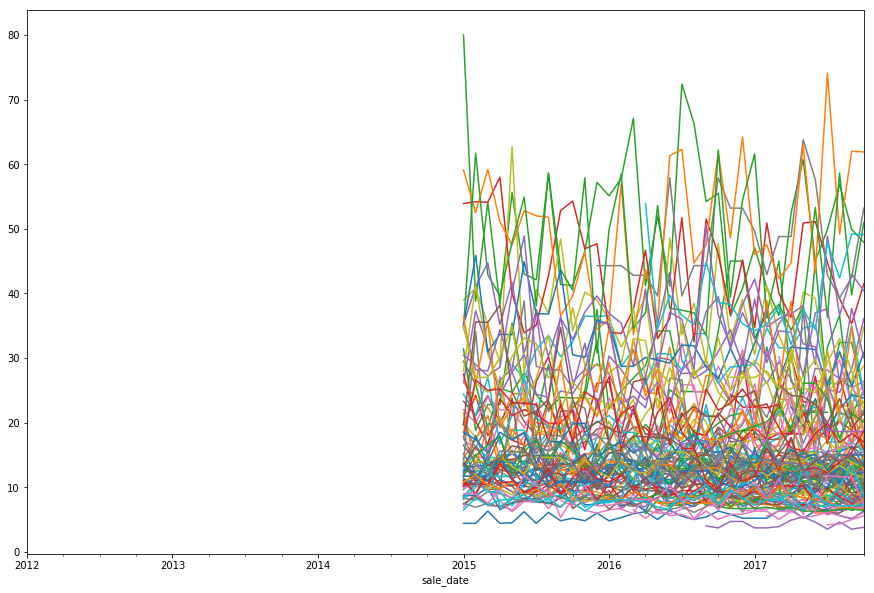

In [22]:
for c in price.index.levels[0]:
    price[c].plot(figsize=(15,10))

In [49]:
price.head()

class_id  sale_date 
103507    2015-03-01     NaN
          2015-04-01    13.9
          2015-05-01    15.7
          2015-06-01    13.5
          2015-07-01    17.8
Name: price, dtype: float64

## 价格段

In [11]:
unique_price_level = df['price_level'].nunique()
print('unique price level: %d' % unique_price_level)

unique price level: 9


In [12]:
price_level_class = df.groupby('price_level').class_id.agg('nunique')

In [13]:
price_level_class

price_level
10-15W    62
15-20W    43
20-25W    24
25-35W    19
35-50W    13
5-8W      22
50-75W     4
5WL        5
8-10W     22
Name: class_id, dtype: int64

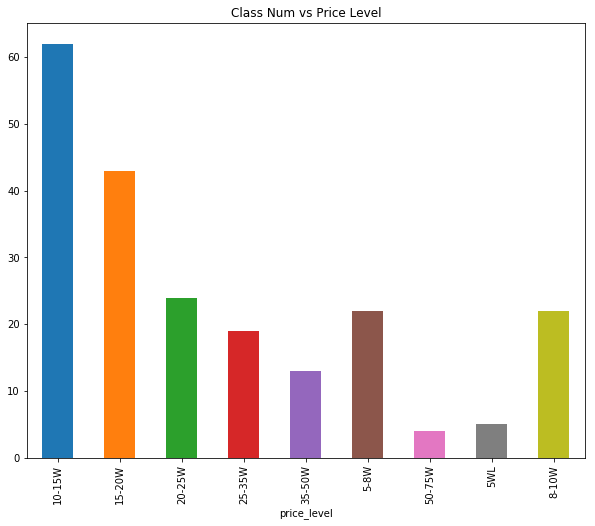

In [14]:
price_level_class.plot.bar(figsize = (10,8), title='Class Num vs Price Level')

In [15]:
price_level_quantity = df.groupby('price_level').sale_quantity.agg('sum')

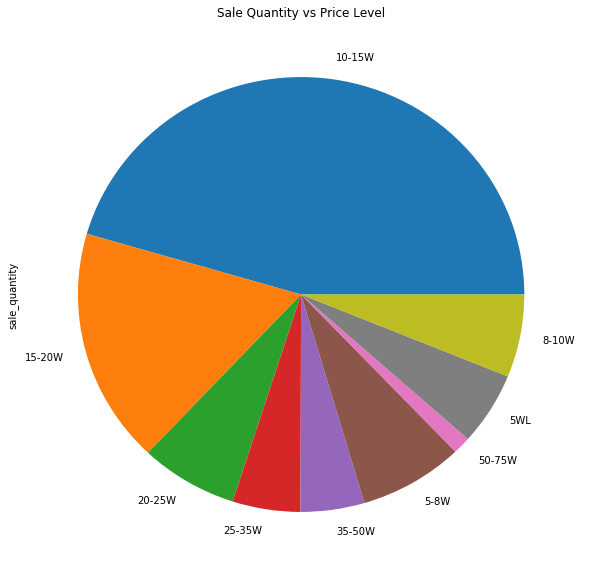

In [16]:
price_level_quantity.plot.pie(figsize = (10,10), title='Sale Quantity vs Price Level')

## 品牌

In [106]:
unique_price_level = df['brand_id'].nunique()
print('unique brand id: %d' % unique_price_level)

unique brand id: 36


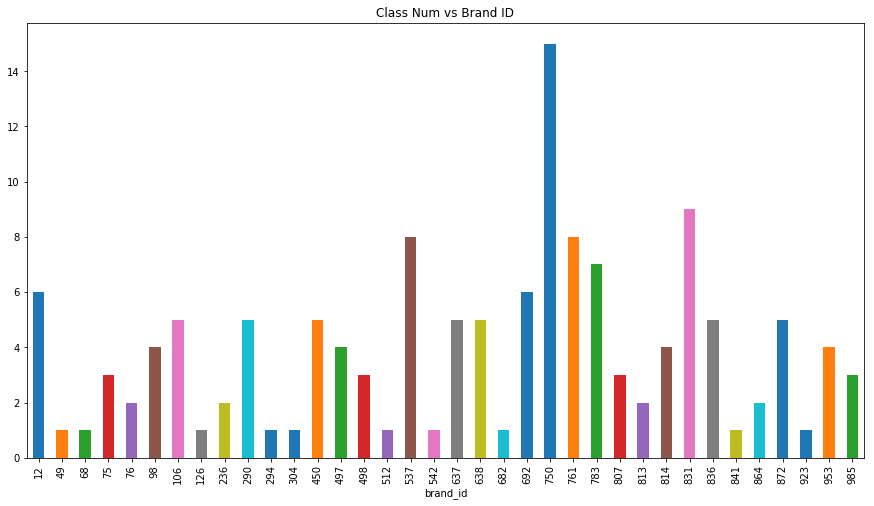

In [107]:
brand_class = df.groupby('brand_id').class_id.agg('nunique')
brand_class.plot.bar(figsize = (15,8), title= 'Class Num vs Brand ID')

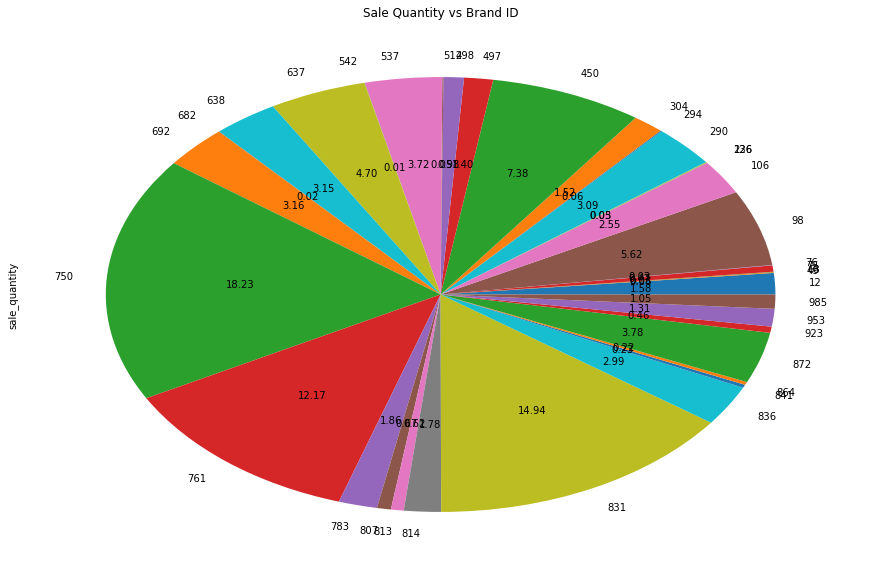

In [141]:
brand_quantity = df[['brand_id','sale_quantity']].groupby('brand_id').sale_quantity.agg('sum')
brand_quantity.plot.pie(figsize = (15,10), title = 'Sale Quantity vs Brand ID', autopct='%.2f')

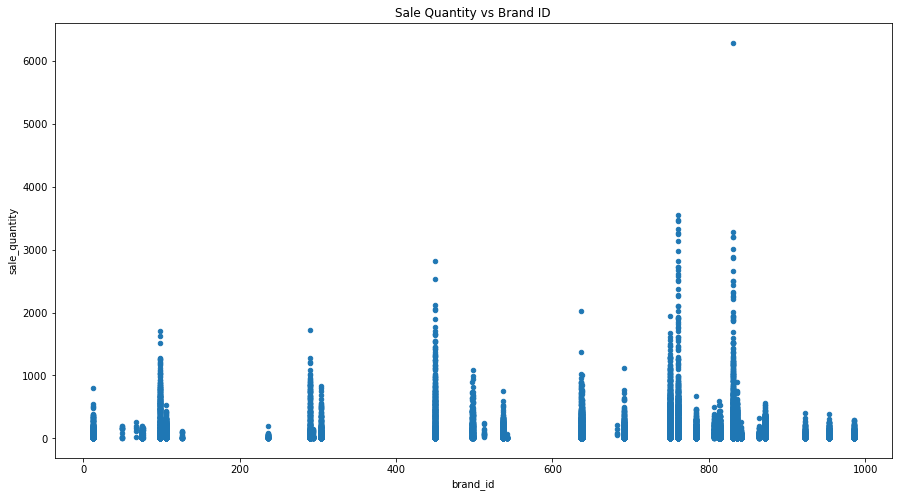

In [109]:
df[['brand_id','sale_quantity']].plot.scatter(x='brand_id',y='sale_quantity', figsize = (15,8),
                                             title='Sale Quantity vs Brand ID')

- 部分品牌销量每月差异较大
- 有异常点

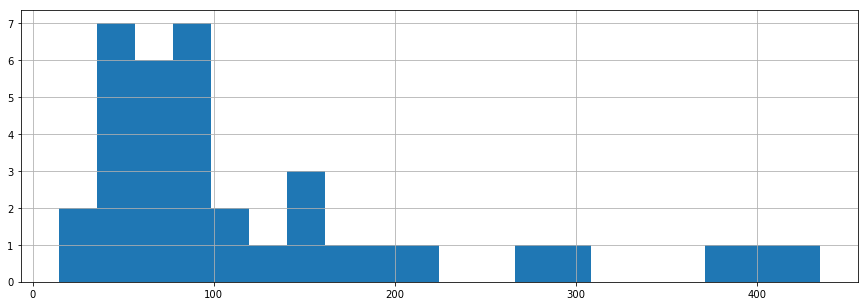

In [110]:
brand_quantity_std = df[['brand_id','sale_quantity']].groupby('brand_id').sale_quantity.agg('std')
brand_quantity_std.hist(bins = 20, figsize = (15,5))

In [111]:
# 标准差大的品牌
brand_quantity_std[brand_quantity_std>200].head()

brand_id
98     294.052964
290    277.690512
450    378.337678
498    217.845048
761    434.339458
Name: sale_quantity, dtype: float64

In [112]:
sale_brand_date = df[['sale_quantity', 'brand_id', 'sale_date']].groupby(['brand_id','sale_date']).sale_quantity.agg('sum')

In [116]:
sale_brand_date.head()

brand_id  sale_date 
12        2012-01-01    47
          2012-02-01    21
          2012-03-01    10
          2012-04-01    10
          2012-05-01    10
Name: sale_quantity, dtype: int64

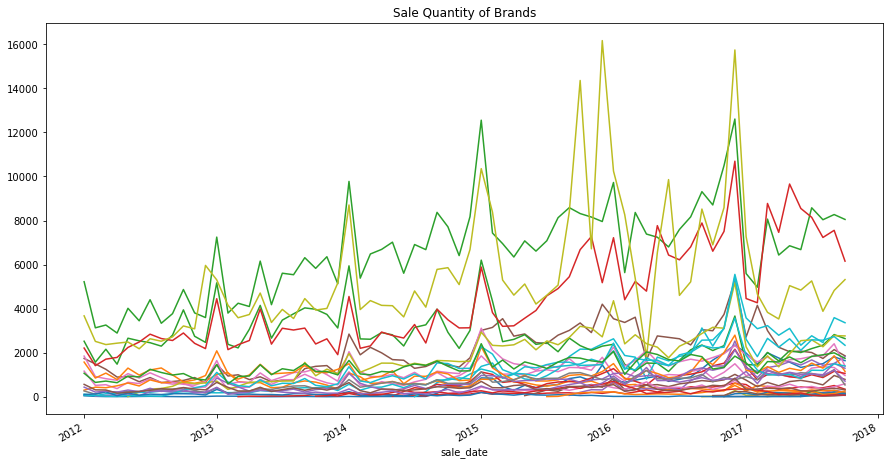

In [122]:
for b in sale_brand_date.index.levels[0]:
    sale_brand_date[b].plot(figsize = (15,8), title= 'Sale Quantity of Brands')

## 车型

In [142]:
class_quantity_date = df[['class_id','sale_quantity','sale_date']].groupby(['class_id','sale_date']).sale_quantity.agg('sum')

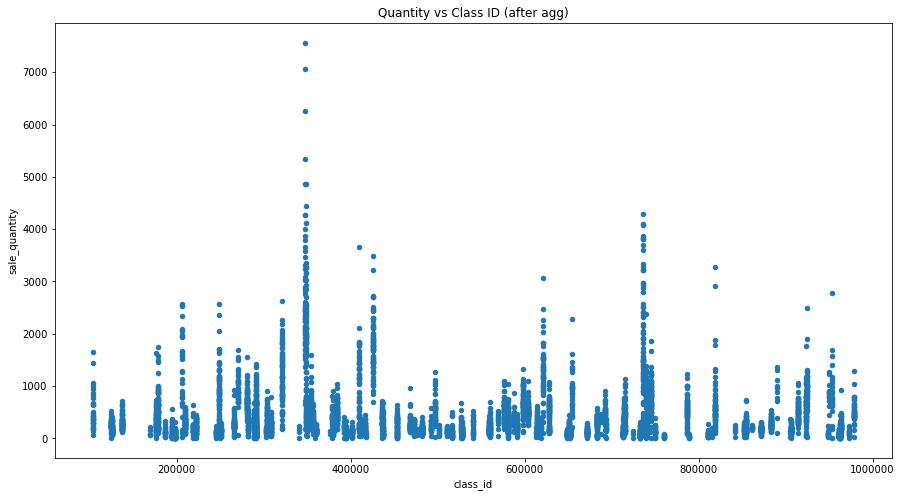

In [151]:
class_quantity_date_df = pd.DataFrame(class_quantity_date)
class_quantity_date_df.head()
class_quantity_date_df.reset_index().plot.scatter(x='class_id', y='sale_quantity', figsize = (15,8),
                                             title='Quantity vs Class ID (after agg)')

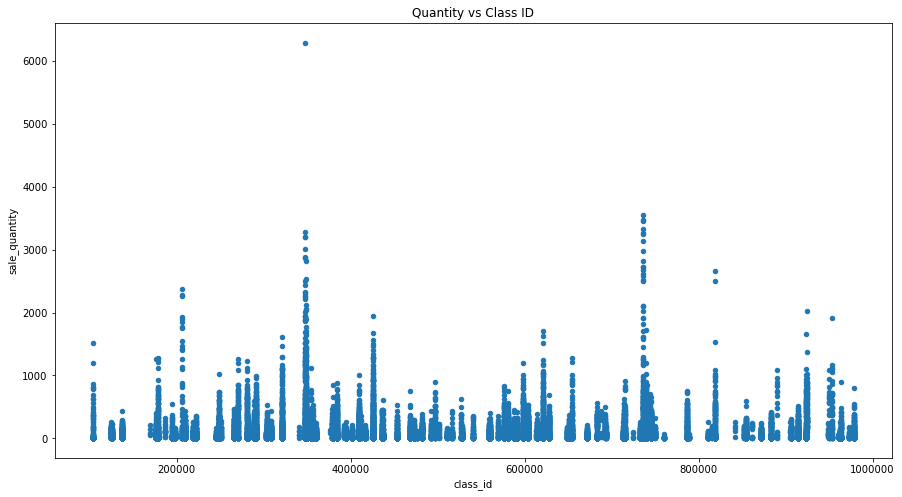

In [71]:
df[['class_id','sale_quantity']].plot.scatter(x='class_id',y='sale_quantity', figsize = (15,8),
                                             title='Quantity vs Class ID')

In [69]:
class_quantity_std = df[['class_id','sale_quantity']].groupby('class_id').sale_quantity.agg('std')

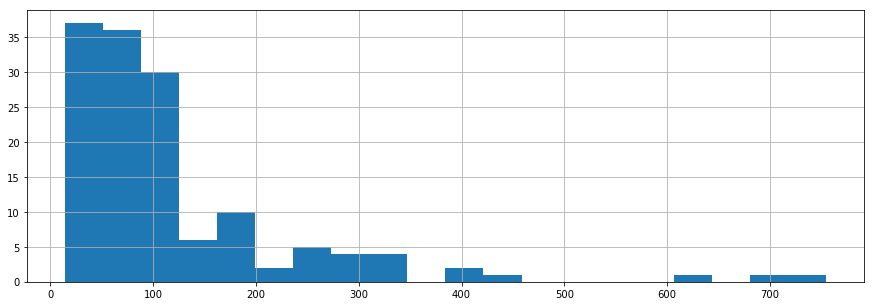

In [75]:
class_quantity_std.hist(bins = 20, figsize = (15,5))

In [72]:
# 标准差大的车型
class_quantity_std[class_quantity_std>300].head()

class_id
206765    630.304329
270690    301.671505
347384    681.467369
349023    437.027843
425432    323.139399
Name: sale_quantity, dtype: float64

## 类别

In [79]:
type_num = df['type_id'].nunique()
print('num of type: %d' % type_num)

num of type: 4


In [93]:
type_sale = df[['sale_quantity', 'type_id']].groupby(['type_id']).sale_quantity.agg('sum')

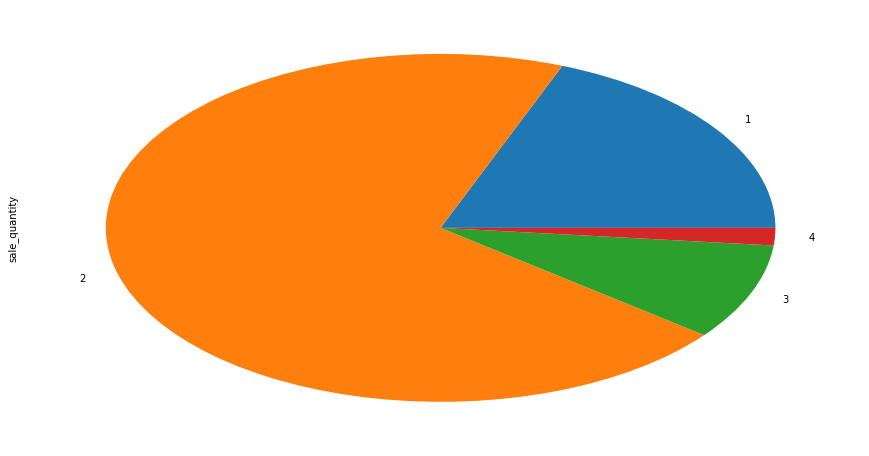

In [96]:
type_sale.plot.pie(figsize = (15,8))

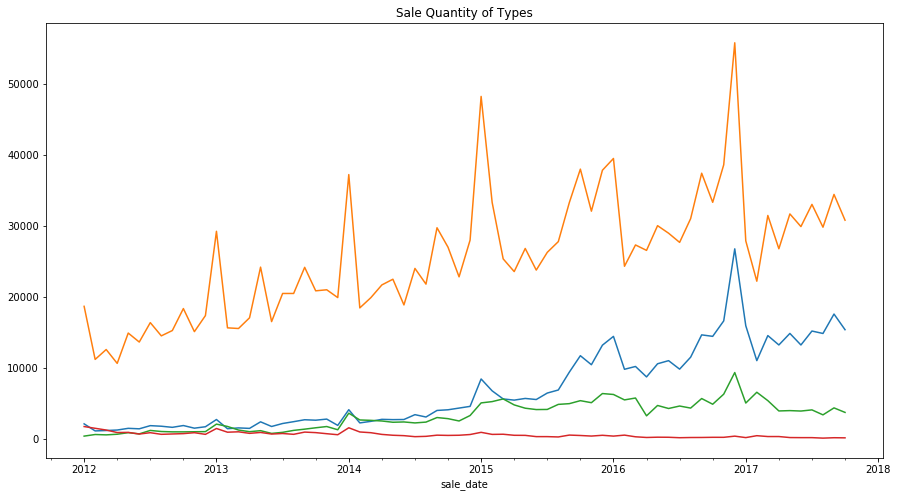

In [125]:
type_sale_date = df[['sale_quantity', 'type_id','sale_date']].groupby(['type_id','sale_date']).sale_quantity.agg('sum')
for t in type_sale_date.index.levels[0]:
    type_sale_date[t].plot(figsize = (15,8), title = 'Sale Quantity of Types')
# 颜色和上图一致

## 相关性
- 只关注后面的特征

In [129]:
numeric_cols = df.select_dtypes([np.number]).columns
numeric_df = df[numeric_cols]

In [134]:
all_cols = numeric_df.columns
print(all_cols)

Index(['class_id', 'sale_quantity', 'brand_id', 'compartment', 'type_id',
       'department_id', 'displacement', 'driven_type_id', 'newenergy_type_id',
       'emission_standards_id', 'if_MPV_id', 'if_luxurious_id',
       'cylinder_number', 'car_length', 'car_width', 'car_height',
       'total_quality', 'equipment_quality', 'wheelbase', 'front_track',
       'rear_track'],
      dtype='object')


[1, 12, 13, 14, 15, 16, 17, 18, 19, 20]


/home/yuanhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f109190a898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f108fc8bba8>]], dtype=object)

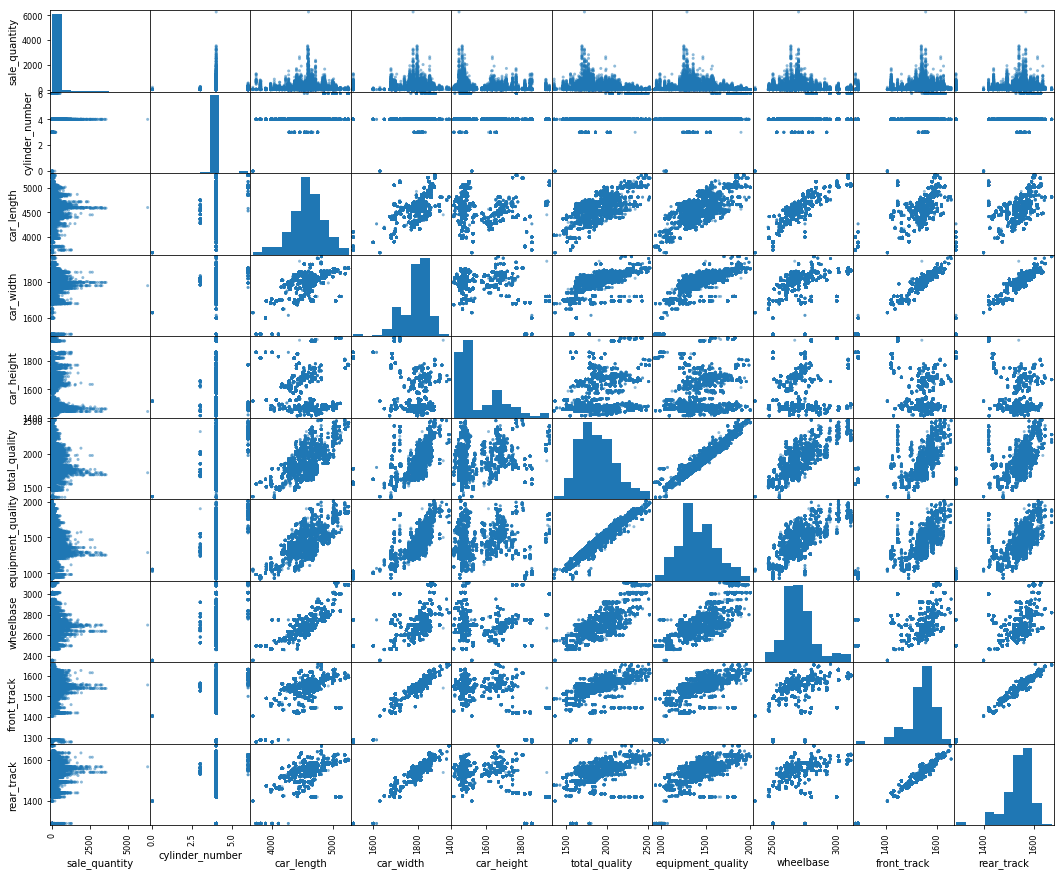

In [137]:
important_cols = [1]+list(range(len(all_cols)-9, len(all_cols)))  #?
print(important_cols)
pd.scatter_matrix(numeric_df.iloc[:,important_cols], figsize = (18,15))

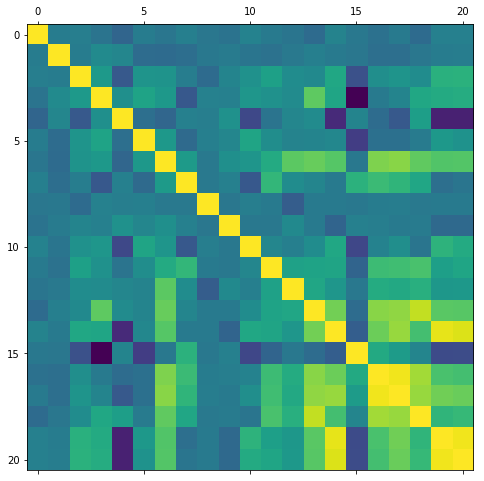

In [152]:
plt.figure(figsize=(8,8))
plt.matshow(numeric_df.corr(), fignum=1)